# Tree-Based Methods

## Intro

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

%matplotlib inline

ამ კლასის პირველი ნაწილისთვის ჩვენ ვიყენებთ სათამაშოების მონაცემთა ბაზას, რომელიც მოყვება Scikit-Learn ბიბლიოთეკას. მონაცემთა ბაზა არის ბოსტონში სახლის ფასების პროგნოზირება 13 უწყვეტი მახასიათებლის გამოყენებით: https://scikit-learn.org/stable/datasets/index.html

ეს მონაცემების მახასიათებლებია:

CRIM- ერთ სულ მოსახლეზე დანაშაულის მაჩვენებელი ქალაქის მიხედვით

ZN - საცხოვრებელი მიწის პროპორციული ზონით განთავსებული 25,000 კვ.მ-ზე მეტი ფართობისთვის.

INDUS - არასამეწარმეო ბიზნესის ჰექტრის პროპორცია თითო ქალაქში

CHAS - Charles River dummy ცვლადი (= 1, თუ ესაზღვრება მდინარე; 0 სხვაგვარად)

NOX - აზოტის ოქსიდების კონცენტრაცია (ნაწილები 10 მილიონზე)

RM - ოთახების საშუალო რაოდენობა საცხოვრებელში

AGE - მესაკუთრეთა მიერ დაკავებული ერთეულების პროპორცია, რომელიც აშენდა 1940 წლამდე

DIS - შეწონილი მანძილი ბოსტონის დასაქმების ხუთი ცენტრისთვის

RAD - რადიალური მაგისტრალებზე წვდომის ინდექსი

TAX- სრული ღირებულების ქონების გადასახადი 10,000 აშშ დოლარზე

PTRATIO - მოსწავლე-მასწავლებელთა კოეფიციენტი ქალაქის მიხედვით

B - 1000 (Bk - 0.63) ^ 2 სადაც Bk არის მოსახლეობის შავკანიანთა რაოდენობა

LSTAT - მოსახლეობის დაბალი სტატუსი

TARGET (ღირებულება, რომლის შეფასებაც უნდა მოვახდინოთ) - მესაკუთრის მიერ უკვე დაკავებული სახლების საშუალო ღირებულება 1000 $


ჩავტივრთოთ მონაცემები და ვნახოთ მისი შიგთავსი, გავაკეთოთ მონაცემების დამუშავება:

In [4]:
# მონაცეების ჩატვირთვა
X, y = load_boston(return_X_y=True)

# ველების სახელები
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# ახალი მონაცემის ბაზის გაკეთებამ უკეთესი ვიზუალიზაციისთვის
df = pd.DataFrame(np.c_[X, y], columns=cols + ['TARGET']); df.shape


(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 visualize distribution 
მოდით ვიზუალიზაცია თითოეული მახასიათებლის განაწილება boxplot– ის გამოყენებით

ჩვენ ვხედავთ, რომ მახასიათებლების მასშტაბი ძალიან განსხვავდება, მაგრამ, საბედნიეროდ, ხეზე დაფუძნებულ მოდელებს <b> არ საჭიროებს </b> მახასიათებლის ხელახალი სკალირებას.

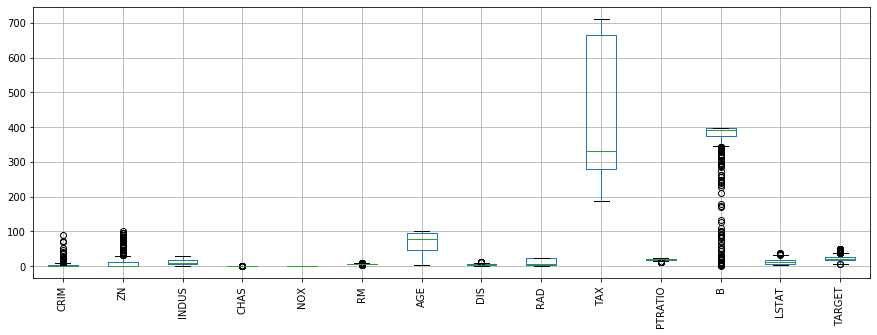

In [6]:
df.plot(kind='box', rot=90, figsize=(15, 5))
plt.grid()

ახლა ვნახოთ კორელაცია 
ჩვენ შეგვიძლია შევამჩნიოთ, რომ ზოგიერთი მახასიათებელი (მაგ. LSTAT, RM) არის <b> მაღალი კორელაცია </ b> მიზნთან, რაც ჩვეულებრივ ნიშნავს, რომ ისინი <b> კარგი ველები არიან </ b> მიზნის შეფასებისთვის.


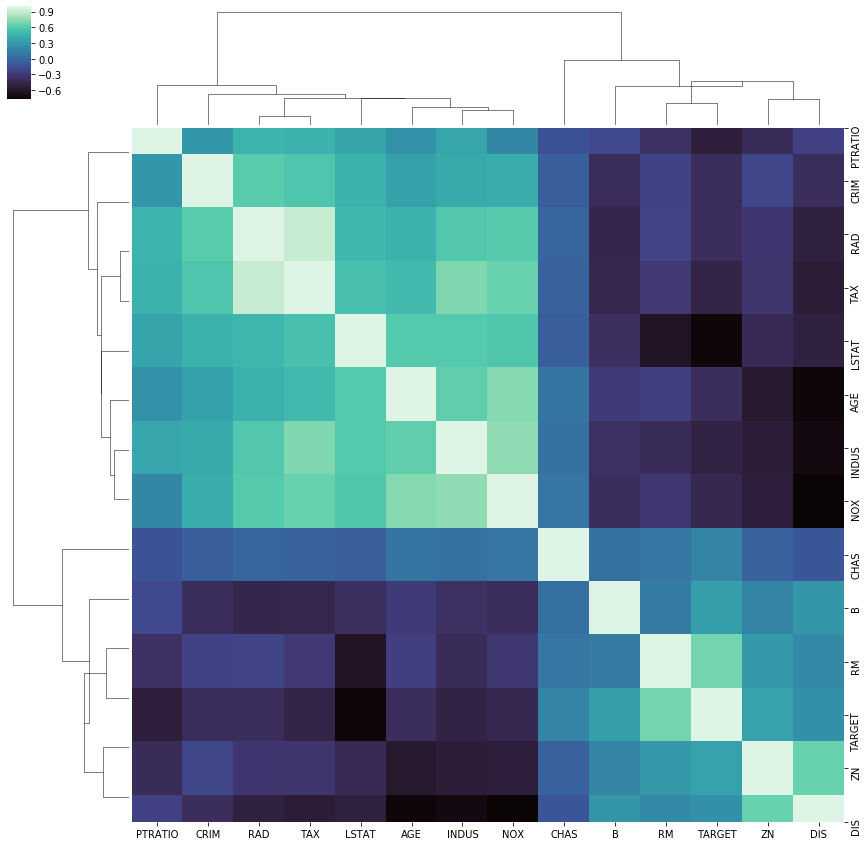

In [8]:
corr = df.corr()
sns.clustermap(corr, figsize=(15, 15), cmap='mako', method='centroid')

In [9]:
# დავალაგოთ კორელაციების კლებადობის მიხედვით

np.abs(corr['TARGET']).sort_values(ascending=False)

TARGET     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: TARGET, dtype: float64

ახლა პროგნოზზე გადავიდეთ.

წარმოვიდგინოთ, რომ ჩვენი მიზანია MSE- ს ოპტიმიზაცია (Mean Squred Error).

ამ შემთხვევაში, ტრივიალური გადაწყვეტა constant predictor გამოყენებით (ყოველთვის ვარაუდობს იგივე მნიშვნელობას, შეყვანის მიუხედავად) იქნება მონაცემთა ბაზაში მოცემული მიზნების <b> საშუალო მაჩვენებელი </b>. მათემატიკურად შეიძლება დავამტკიცოთ, რომ MSE– სთვის ოპტიმალური მუდმივი პროგნოზი ნამდვილად ნიშნავს. 
მოდით გავარკვიოთ, თუ რა არის MSE ამ შემთხვევაში (სიმარტივისთვის ჩვენ არ ვყოფთ მონაცემებს და ყველაფერს გავაკეთებთ ახლავე მითითებულ ტრენინგზე)


In [13]:
def mse(x, y):
    return np.mean((y - x) ** 2)

constant_predictor = df['TARGET'].mean()

mse(constant_predictor, df['TARGET'])

84.4195561561656

ემპირიულად ვხედავთ, რომ ოპტიმალური მუდმივი პროგნოზირებისგან გადახრა იწვევს MSE– ს ზრდას, ანუ MSE– ს ოპტიმალურია.

In [14]:
eps = 1

mse(constant_predictor - eps, df['TARGET']), mse(constant_predictor + eps, df['TARGET'])

(85.41955615616551, 85.41955615616557)

კარგი, ახლა მოდით ვცადოთ ოდნავ უკეთესი.

შევეცადოთ გავყოთ ჩვენი სასწავლო კომპლექტი <b> ორ ჯგუფში </b> და თითოეული ჯგუფისთვის, გამოვთვალოთ <b> საკუთარი საშუალებები </ b>. თუ ეს გაყოფა ჭკვიანურად გამოვიყენებთ, ინტუიციურად ორი გზა უკეთესი იქნება ვიდრე უბრალოდ <b> ერთიანი გლობალური საშუალების გამოყენება </b> როგორც ეს წინა მაგალითში გავაკეთეთ.

გაყოფის გაკეთების ერთი გზა არის მონაცემების მახასიათებლების არჩევა, ვთქვათ X, და რამდენიმე threshold, T და შევადგინოთ: <br /> <br />
ჯგუფი 1 - {ყველა ქულა, რომელსაც აქვს $ X <T $} <br /> 
ჯგუფი 2 - {ყველა ქულა, რომელსაც აქვს $ X> = T $} <br />

შემდეგ გვექნება 2 მუდმივი პროგნოზი - ერთი თითოეული ჯგუფისთვის - და ყოველი შეყვანისთვის, პირველ რიგში, განვსაზღვრავთ მის ჯგუფს და შემდეგ ჯგუფის საშუალებებს გამოვიყენებთ მიზნის შესაფასებლად.

ეს ინტუიცია არის მიღებული გადაწყვეტილების ხე- 1 სიღრმით.


In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

[Text(167.4, 163.07999999999998, 'RM <= 6.941\nmse = 84.42\nsamples = 100.0%\nvalue = 22.533'),
 Text(83.7, 54.360000000000014, 'mse = 40.273\nsamples = 85.0%\nvalue = 19.934'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 79.729\nsamples = 15.0%\nvalue = 37.238')]

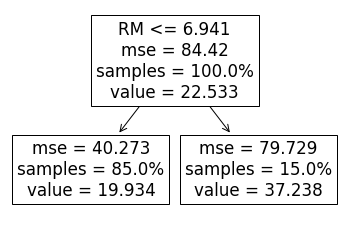

In [16]:
# გადაწყვეტილების ხე სიღრმე 1.
dt = DecisionTreeRegressor(max_depth=1)

# მოდელის fitting-ი
model = dt.fit(X, y)

# ხის ვიზუალიზაცია
plot_tree(model, feature_names=cols, proportion=True)

როგორც ვხედავთ, გადაწყვეტილების ხე აირჩია მახასიათებლის "RM" და ბარიერი T = 6.941, რათა გაყოფილიყო. თქვენ ასევე შეგიძლიათ იხილოთ ნიმუშების პროპორცია ორ ჯგუფში და პროგნოზისთვის გამოყენებული საშუალების მნიშვნელობა.

მოდით გადავამოწმოთ ეს სურათი:


In [17]:
left = df[df['RM'] < 6.941]['TARGET']
right = df[df['RM'] > 6.941]['TARGET']

left.mean(), right.mean(), mse(left.mean(), left), mse(right.mean(), right)

(19.93372093023257, 37.23815789473684, 40.272839643050304, 79.7292018698061)

ინტუიციურად, ჩვენ შეგვიძლია გავყოთ გავლით და ჯგუფებად (ფოთლოვან კვანძებზე) რეკურსიულად მივმართოთ იგივე გაყოფის ლოგიკას ...

მაგალითად, ხე სიღრმე = 2 შეგიძლიათ იხილოთ ქვემოთ


[Text(167.4, 181.2, 'RM <= 6.941\nmse = 84.42\nsamples = 100.0%\nvalue = 22.533'),
 Text(83.7, 108.72, 'LSTAT <= 14.4\nmse = 40.273\nsamples = 85.0%\nvalue = 19.934'),
 Text(41.85, 36.23999999999998, 'mse = 26.009\nsamples = 50.4%\nvalue = 23.35'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 19.276\nsamples = 34.6%\nvalue = 14.956'),
 Text(251.10000000000002, 108.72, 'RM <= 7.437\nmse = 79.729\nsamples = 15.0%\nvalue = 37.238'),
 Text(209.25, 36.23999999999998, 'mse = 41.296\nsamples = 9.1%\nvalue = 32.113'),
 Text(292.95, 36.23999999999998, 'mse = 36.628\nsamples = 5.9%\nvalue = 45.097')]

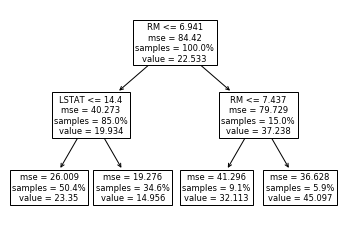

In [18]:
dt = DecisionTreeRegressor(max_depth=2)
model = dt.fit(X, y)
plot_tree(model, feature_names=cols, proportion=True)

ზოგადი შენიშვნები რეგრესიის გადაწყვეტილების ხეების შესახებ

საერთოდ, არ არის საჭირო ორობითი ხეების გამოყენება (ე.ი. ორი ადამიანის ნაცვლად შეიძლება სამი ჯგუფი გვქონდეს) და გაყოფილიყო ცალკეული მახასიათებლის არჩევა. თუმცა, ჩვენ მიერ გამოყენებული მიდგომა ყველაზე ფართოდ გამოიყენება და პოპულარულია.
პრაქტიკაში, ხეები განიცდიან დაბალ მიკერძოებას და ძალიან მაღალ ცვალებადობას - ანუ ისინი ტენდენციას განიცდიან. ხის სირთულის კონტროლის ერთ-ერთი გზაა მისი სიღრმის შეზღუდვა ან კოდის დასადგენად საჭირო მონაცემთა მინიმალური რაოდენობის შეზღუდვის დაწესება. ჩვეულებრივ, ანსამბლის მიდგომები (ამ კლასში გატარება) გამოიყენება ცვალებადობის შესამცირებლად.
ნომინალური კატეგორიული ცვლადების (მაგ., რომელთა შეკვეცაც შეუძლებელია) გაყოფა ხდება ცვლადისთვის მნიშვნელობათა სიმრავლის დაყოფით. მაგალითად, თუ ჩვენ გვაქვს X = {A, B, C}, ვიდრე შეიძლება გვქონდეს {A} {B, C}  როგორც განაყოფი.
მეტის გაგება: https://scikit-learn.org/stable/modules/tree.html


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.95)

preds = []
for i in range(100):
    
    X_tr, Y_tr = shuffle(X_train, Y_train)[:100]

    Y_pred = DecisionTreeRegressor(max_depth=10).fit(X_tr, Y_tr).predict(X_test)

    preds.append(Y_pred)
    
    
print('Var:', np.mean((np.array(preds) - np.mean(preds, axis=0))**2))

Var: 6.426542325285744


### Ensembling

მოდელის ანსამბლი არის ტექნიკა მანქანაში სწავლისას <b> სტაბილიზაცია (შეამციროს ცვალებადობა) </b> მოდელის პროგნოზი უხილავი ნიმუშების შესახებ. განსაკუთრებით სასარგებლოა თანდაყოლილი <b> მაღალი ცვალებადობის </b> მოდელებისთვის, მაგალითად, გადაწყვეტილების ხეებისთვის.

იდეა ერთი და იგივე ამოცანისთვის მომზადებული მრავალჯერადი მოდელის სწავლება და მათი პროგნოზების შერწყმაა, ჩვეულებრივ, რეგრესიისა და კლასიფიკაციის შემთხვევაში, საშუალოდ ხმის მიცემით ან ხმათა უმრავლესობით ხდება.
იმის გასაგებად, თუ რატომ მუშაობს ეს (ანუ ამცირებს მოდელის ვარიანტს), მოდით გადახედოთ შემდეგ ფაქტს:

To see why it works (i.e reduces model variance), let's take a look at following fact:

Let's $X_1, X_2, ..., X_n \sim^{iid} X$ and $\bar{X_n}=\frac{1}{n}\sum_{i=1}^n{X_i}$ be a sample average. If $Var(X_i)=\sigma^2$, then $Var(\bar{X_n})=Var(\frac{1}{n}\sum_{i=1}^n{X_i})=\frac{\sigma}n$

ეს ფაქტი შეიძლება ითარგმნოს ML ტერმინოლოგიაში: თუ ვიღებთ $ N $ "დამოუკიდებელ" მოდელებს გარკვეული ვარიაციით და საშუალოთი ვხვდებით მათ პროგნოზს, უნდა მივიღოთ linear decay of variance. დამოუკიდებლობისთვის ჩვენ ვგულისხმობთ დამოუკიდებელ ნიმუშებზე მომზადებულ მოდელებს, რომლებიც შედგენილია underlying data distribution,, თუმცა პრაქტიკაში ეს შეუძლებელია, ამიტომ ჩვენ გამოვიყენებთ <b> Cross-Validation </b> დამოუკიდებელი ნიმუშების, ან ე.წ. ფსევდო დამოუკიდებელი ნიმუშის წარმოქმნა შესაძლებელია თავად ნიმუშიდან, ჩანაცვლებით).   ეს ჩვეულებრივ კარგად უშაობს.

ინტუიციურად <b> ერთი მოდელის VS ანსამბლი </b> არის მასზე ფიქრი, როგორც გადაწყვეტილება მიიღოს ერთმა ადამინმა არ მთელმა ჯგუფმა - უკანასკნელი უფრო სტაბილური და სანდოა.



<b><big>Random Forests</big></b>

პრაქტიკაში, თითქმის ყოველთვის ვიყენებთ გადაწყვეტილების ხის ანსამბლს (a.k.a <b> Random Forests </b>) ერთი ხის ნაცვლად. შემთხვევითი ტყე შედგება მრავალჯერადი გადაწყვეტილების ხისგან, როგორც წესი, თითოეული სწავლობს სასწავლო მონაცემებზე. ამასთან, ეს ჩვეულებრივი პრაქტიკაა თითოეული ცალკეული ხის თვისებების <b> მცირე შემთხვევითი ჩანართი </b> და ამ მახასიათებლების საფუძველზე ააშენეთ ხეები. ტყეში ხეების რაოდენობა ძალზედ განსხვავდება დავალებიდან დავალებამდე, შეიძლება იყოს 10, 100 ან თუნდაც 1000


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.95)

preds = []
for i in range(100):
    
    X_tr, Y_tr = shuffle(X_train, Y_train)[:100]

    Y_pred = RandomForestRegressor(max_depth=10, n_estimators=50).fit(X_tr, Y_tr).predict(X_test)

    preds.append(Y_pred)
    
    
print('Var:  ', np.mean((np.array(preds) - np.mean(preds, axis=0))**2))

Var:   0.14038565062670522
